<a href="https://colab.research.google.com/github/jieun0441/DeeplearningStudy/blob/main/PropertyGuru_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Project Purpose : 


*   코로나 전에는 대부분 시간을 직장이나 밖에서 보냈으나, 팬데믹 이후 원격으로 공부, 재택근무 증가, 모임 제한으로 외출도 거의 없어 사람들이 집에 머무르는 시간이 늘어났음. 이에 따라 주거 소비자의 공간크기와 주거공간의 질에 대한 눈높이가 달라졌을 것이라 예상됨. 
* 한편, 주택시장에서 공급자에 해당하는 "주택을 파는 사람들"의 마케팅 방식에도 변화가 있지 않았을까? 하는 질문에서 시작
* 예상하는 결과는 아래와 같음
1. 'spacious' (넓은) 거실과 방을 강조하는 게시물이 코로나 이후에 많아졌을
것이다, 
2. greenery, view 이런 조망에 대한 강조가 더 커졌을 것이다. 잠만 자는 장소가 아니라 하루종일 답답함없이 휴식도 취하고 모든생활을 해야하는 장소가 집이 되었으니까.
3. studyroom이 있다는 점에 대한 홍보가 더 많아졌을것이다 (공부/사무공간이 있다는 점 어필)

✅ 현재상태: 해야 할 것들을 리스팅 + 아이디어 끄적끄적 + 아이디어 안떠오를땐 해야할거 적어놓은거 조금씩 해보기 섞어가며 하는중...
그래서 어떤 건 되어 있고, 어떤건 이거 해야지 아이디어만 적혀있기도 하고 그렇습니당...

# 1. opening data

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import missingno as msno
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [277]:
df = pd.read_csv('/content/drive/MyDrive/PropertyGuru/PreparedCSV/2019-10-28/sale/property_data_2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,20,35,40,41,42,44,45,46,47,48,49,54,55,56,57,58,62,63,66,67,68,69,70,72,73,75,76,78,79,80,81,82,83,84,85,86,87,88,89,91,93,94,95,97,98,99,100,102,103,104,106,107,108,109,110,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,173,176,177) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# df.head() # 188개의 컬럼이 아래와 같은 형태로 존재

,Unnamed: 0,listing_url,agent.name,agent.license,agent.url,agent.agency,agent.phone_number,listing_properties,listing_properties.Type,listing_properties.Tenure,listing_properties.Floor size,listing_properties.Developer,listing_properties.Land size,listing_properties.PSF,listing_properties.Furnishing,listing_properties.TOP,listing_properties.Floor Level,listing_properties.Listing ID,listing_properties.Currently Tenanted,listing_properties.Listed on,listing_properties.Maintenance Fee,listing_properties.Parking Spaces,development_properties.Type,development_properties.TOP,development_properties.Tenure,development_properties.Total Unit(s),development_properties.url,development_properties.name,amenities,amenities.Air-Conditioning,amenities.Balcony,amenities.Cooker Hob/Hood,amenities.Corner Unit,amenities.High Floor,amenities.Intercom,amenities.Swimming Pool View,amenities.Renovated,amenities.Water Heater,amenities.Children's Playground,amenities.Fitness corner,...,amenities.Raised Access Floor,amenities.ISDN,amenities.Loading Bay,amenities.Own Generator Facility,amenities.Large Floor Plates,amenities.Restrooms,amenities.SCV/SMATV System,amenities.Turnstile System,amenities.Chilled Water Supply,amenities.>15m Core-to-Window,amenities.Handicap-friendly,amenities.Security Access Control,amenities.Broadband Internet,amenities.Dual Telecoms Risers,amenities.IT Support,amenities.Kitchen,amenities.Own Chiller Plant,amenities.Reception Services,amenities.Secretarial Services,amenities.Server Room,amenities.Videoconferencing,free_text_description,address.country,address.street,address.postal_code,address.locality,address.latitude,address.longitude,number_of_rooms,number_of_baths,floor_size,floor_size_unit,price,currency,image_urls,created_at,images,images.url,images.path,images.checksum
0,0,http://api.scraperapi.com/?api_key=b0560c3ca5b...,Mark Yu,CEA: R024989D / L3002382K,https://propertyguru.com.sg/agent/mark-yu-155726,ERA REALTY NETWORK PTE LTD,+65 9248 3248,NaN,Condominium For Sale,99-year Leasehold,1345 sqft,United Venture Development (Clementi) Pte. Ltd.,NaN,"S$ 1,561.34 psf",Unfurnished,2019.0,High Floor,22010108.0,No,2 hours ago,NaN,NaN,Condominium,2019.0,99-year Leasehold,505.0,https://propertyguru.com.sg/project/the-clemen...,The Clement Canopy,NaN,True,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Description Lovely 4br unit seaview high flo...,sg,18 Clementi Avenue 1,129960.0,Buona Vista / West Coast / Clementi New Town,1.307856,103.769831,4,4,1345.0,sqft,2100000.0,SGD,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,2019-10-26 11:16:00.207427,NaN,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,full/24bc5bebbda71c1facf11be1f20ae2a67e680053.jpg,15a1054d58e29e823378a0dad33911c4
1,1,http://api.scraperapi.com/?api_key=b0560c3ca5b...,Mark Yu,CEA: R024989D / L3002382K,https://propertyguru.com.sg/agent/mark-yu-155726,ERA REALTY NETWORK PTE LTD,+65 9248 3248,NaN,Condominium For Sale,99-year Leasehold,1345 sqft,United Venture Development (Clementi) Pte. Ltd.,NaN,"S$ 1,561.34 psf",Unfurnished,2019.0,High Floor,22010108.0,No,2 hours ago,NaN,NaN,Condominium,2019.0,99-year Leasehold,505.0,https://propertyguru.com.sg/project/the-clemen...,The Clement Canopy,NaN,True,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sg,18 Clementi Avenue 1,129960.0,Buona Vista / West Coast / Clementi New Town,1.307856,103.769831,4,4,1345.0,sqft,2100000.0,SGD,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,2019-10-26 11:16:00.207427,NaN,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,full/96c4833bfdc0b040270d543e8b50b0cf2cdd5b91.jpg,63cd1f758e00586c9b58ab4def04811f
2,2,http://api.scraperapi.com/?api_key=b0560c3ca5b...,Mark Yu,CEA: R024989D / L3002382K,https://propertyguru.com.sg/agent/mark-yu-155726,ERA REALTY NETWORK PTE LTD,+65 9248 3248,NaN,Condominium For Sale,99-year L

In [ ]:
#df.tail() #하위 5개 데이터를 보면 아래와 같이, 2019년 한 시점 데이터에만도 약 135만개행 존재

,Unnamed: 0,listing_url,agent.name,agent.license,agent.url,agent.agency,agent.phone_number,listing_properties,listing_properties.Type,listing_properties.Tenure,listing_properties.Floor size,listing_properties.Developer,listing_properties.Land size,listing_properties.PSF,listing_properties.Furnishing,listing_properties.TOP,listing_properties.Floor Level,listing_properties.Listing ID,listing_properties.Currently Tenanted,listing_properties.Listed on,listing_properties.Maintenance Fee,listing_properties.Parking Spaces,development_properties.Type,development_properties.TOP,development_properties.Tenure,development_properties.Total Unit(s),development_properties.url,development_properties.name,amenities,amenities.Air-Conditioning,amenities.Balcony,amenities.Cooker Hob/Hood,amenities.Corner Unit,amenities.High Floor,amenities.Intercom,amenities.Swimming Pool View,amenities.Renovated,amenities.Water Heater,amenities.Children's Playground,amenities.Fitness corner,...,amenities.Raised Access Floor,amenities.ISDN,amenities.Loading Bay,amenities.Own Generator Facility,amenities.Large Floor Plates,amenities.Restrooms,amenities.SCV/SMATV System,amenities.Turnstile System,amenities.Chilled Water Supply,amenities.>15m Core-to-Window,amenities.Handicap-friendly,amenities.Security Access Control,amenities.Broadband Internet,amenities.Dual Telecoms Risers,amenities.IT Support,amenities.Kitchen,amenities.Own Chiller Plant,amenities.Reception Services,amenities.Secretarial Services,amenities.Server Room,amenities.Videoconferencing,free_text_description,address.country,address.street,address.postal_code,address.locality,address.latitude,address.longitude,number_of_rooms,number_of_baths,floor_size,floor_size_unit,price,currency,image_urls,created_at,images,images.url,images.path,images.checksum
1345984,1345984,http://api.scraperapi.com/?api_key=b0560c3ca5b...,Alicia Ho,CEA: R044594D / L3009250K,https://propertyguru.com.sg/agent/alicia-ho-19...,ORANGETEE & TIE PTE LTD,+65 9816 2500,NaN,Condominium For Sale,99-year Leasehold,1442 sqft,Far East Organization,NaN,"S$ 1,248.27 psf",NaN,2012.0,NaN,13644945.0,No,3 days ago,NaN,NaN,Condominium,2012.0,99-year Leasehold,437.0,https://propertyguru.com.sg/,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Description Best buy! 4bed! 1442sf! Reservoir...,sg,776 Bedok Reservoir Road,479253.0,Bedok / Upper East Coast,1.337603,103.93079,4,4,1442.0,sqft,1800000.0,SGD,https://sg1-cdn.pgimgs.com/property/1597/PPHO....,2019-10-29 00:18:42.027027,NaN,https://sg1-cdn.pgimgs.com/property/1597/PPHO....,full/eb23dcf63120d69f200f90c307a73f80586a00ee.jpg,5f939a1e3bc586be43ac0e73d367515d
1345985,1345985,http://api.scraperapi.com/?api_key=b0560c3ca5b...,NaN,NaN,https://propertyguru.com.sg/,NaN,+65 9839 8278,NaN,Terraced House For Sale,Freehold,4000 sqft,NaN,1561 sqft,"S$ 2,178.09 psf",Unfurnished,2019.0,NaN,21465525.0,No,5 days ago,NaN,NaN,NaN,NaN,NaN,NaN,https://propertyguru.com.sg/,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,True,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Description Space Maxi! Terrace with 7 bedro...,sg,Jalan Kembangan,416551.0,Eunos / Geylang / Paya Lebar,1.321062,103.91305,7,7,4000.0,sqft,3400000.0,SGD,https://sg2-cdn.pgimgs.com/listing/21465525/UP...,2019-10-29 00:18:49.957944,NaN,https://sg2-cdn.pgimgs.com/listing/21465525/UP...,full/6b0c85bba268b4562b5ed8639a500ebbfad63b6d.jpg,ca7e9e409fb53693274be3d9b426b5dc
1345986,1345986,http://api.scraperapi.com/?api_key=b0560c3ca5b...,NaN,NaN,https://propertyguru.com.sg/,NaN,+65 9839 8278,NaN,Terraced House For Sale,Freehold,4000 sqft,NaN,1561 sqft,"S$ 2,178.09 psf",Unfurnished,2019.0,NaN,21465525.0,No,5 days ago,NaN,NaN,NaN,NaN,NaN,NaN,https://propertyguru.com.sg/,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,True,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sg,Jalan

In [194]:
df.info() # 데이터프레임 정보 요약 - 대다수가 문자형 변수. 수치형태인 것은 14개 컬럼 존재. 메모리 사용이 큼.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345989 entries, 0 to 1345988
Columns: 188 entries, Unnamed: 0 to images.checksum
dtypes: float64(13), int64(1), object(174)
memory usage: 1.9+ GB


# 2. data cleaning & transformation

## 2-1) description 변수 정리
description이라는 단어는 덜어내고, 나머지 파트를 앞에서부터 15개 단어 정도 가지고 와 description이라는 컬럼에 넣기

In [279]:
# description이 비어있는 셀 맞게 찾아 채워넣기
df['free_text_description'] = df['free_text_description'].fillna(method='ffill')

In [280]:
df['free_text_description'].isnull().sum()

0

In [281]:
# Description이라고 붙어 있는 문자열 자르기
df['free_text_description'] = df['free_text_description'].str.replace("Description ", '')

In [288]:
df['free_text_description'].head(5) # 확인

0      Lovely 4br unit seaview high floor for sale! ❤️
1      Lovely 4br unit seaview high floor for sale! ❤️
2      Lovely 4br unit seaview high floor for sale! ❤️
3      Lovely 4br unit seaview high floor for sale! ❤️
4      Lovely 4br unit seaview high floor for sale! ❤️
Name: free_text_description, dtype: object

In [283]:
# Description열의 글자수를 50개 미만으로 자르기
df['free_text_description'] = df['free_text_description'].apply(lambda x: x[:49])
df['free_text_description']

0            Lovely 4br unit seaview high floor for sale! ❤️
1            Lovely 4br unit seaview high floor for sale! ❤️
2            Lovely 4br unit seaview high floor for sale! ❤️
3            Lovely 4br unit seaview high floor for sale! ❤️
4            Lovely 4br unit seaview high floor for sale! ❤️
                                 ...                        
1345984     Best buy! 4bed! 1442sf! Reservoir facing! Call 9
1345985      Space Maxi! Terrace with 7 bedrooms Realstar - 
1345986      Space Maxi! Terrace with 7 bedrooms Realstar - 
1345987      Space Maxi! Terrace with 7 bedrooms Realstar - 
1345988     Best buy! 4bed! 1442sf! Reservoir facing! Call 9
Name: free_text_description, Length: 1345989, dtype: object

In [284]:
df.head() # 스크롤 오른쪽 80% 정도 지점에서 발견 가능

,Unnamed: 0,listing_url,agent.name,agent.license,agent.url,agent.agency,agent.phone_number,listing_properties,listing_properties.Type,listing_properties.Tenure,listing_properties.Floor size,listing_properties.Developer,listing_properties.Land size,listing_properties.PSF,listing_properties.Furnishing,listing_properties.TOP,listing_properties.Floor Level,listing_properties.Listing ID,listing_properties.Currently Tenanted,listing_properties.Listed on,listing_properties.Maintenance Fee,listing_properties.Parking Spaces,development_properties.Type,development_properties.TOP,development_properties.Tenure,development_properties.Total Unit(s),development_properties.url,development_properties.name,amenities,amenities.Air-Conditioning,amenities.Balcony,amenities.Cooker Hob/Hood,amenities.Corner Unit,amenities.High Floor,amenities.Intercom,amenities.Swimming Pool View,amenities.Renovated,amenities.Water Heater,amenities.Children's Playground,amenities.Fitness corner,...,amenities.Raised Access Floor,amenities.ISDN,amenities.Loading Bay,amenities.Own Generator Facility,amenities.Large Floor Plates,amenities.Restrooms,amenities.SCV/SMATV System,amenities.Turnstile System,amenities.Chilled Water Supply,amenities.>15m Core-to-Window,amenities.Handicap-friendly,amenities.Security Access Control,amenities.Broadband Internet,amenities.Dual Telecoms Risers,amenities.IT Support,amenities.Kitchen,amenities.Own Chiller Plant,amenities.Reception Services,amenities.Secretarial Services,amenities.Server Room,amenities.Videoconferencing,free_text_description,address.country,address.street,address.postal_code,address.locality,address.latitude,address.longitude,number_of_rooms,number_of_baths,floor_size,floor_size_unit,price,currency,image_urls,created_at,images,images.url,images.path,images.checksum
0,0,http://api.scraperapi.com/?api_key=b0560c3ca5b...,Mark Yu,CEA: R024989D / L3002382K,https://propertyguru.com.sg/agent/mark-yu-155726,ERA REALTY NETWORK PTE LTD,+65 9248 3248,NaN,Condominium For Sale,99-year Leasehold,1345 sqft,United Venture Development (Clementi) Pte. Ltd.,NaN,"S$ 1,561.34 psf",Unfurnished,2019.0,High Floor,22010108.0,No,2 hours ago,NaN,NaN,Condominium,2019.0,99-year Leasehold,505.0,https://propertyguru.com.sg/project/the-clemen...,The Clement Canopy,NaN,True,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lovely 4br unit seaview high floor for sale! ❤️,sg,18 Clementi Avenue 1,129960.0,Buona Vista / West Coast / Clementi New Town,1.307856,103.769831,4,4,1345.0,sqft,2100000.0,SGD,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,2019-10-26 11:16:00.207427,NaN,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,full/24bc5bebbda71c1facf11be1f20ae2a67e680053.jpg,15a1054d58e29e823378a0dad33911c4
1,1,http://api.scraperapi.com/?api_key=b0560c3ca5b...,Mark Yu,CEA: R024989D / L3002382K,https://propertyguru.com.sg/agent/mark-yu-155726,ERA REALTY NETWORK PTE LTD,+65 9248 3248,NaN,Condominium For Sale,99-year Leasehold,1345 sqft,United Venture Development (Clementi) Pte. Ltd.,NaN,"S$ 1,561.34 psf",Unfurnished,2019.0,High Floor,22010108.0,No,2 hours ago,NaN,NaN,Condominium,2019.0,99-year Leasehold,505.0,https://propertyguru.com.sg/project/the-clemen...,The Clement Canopy,NaN,True,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lovely 4br unit seaview high floor for sale! ❤️,sg,18 Clementi Avenue 1,129960.0,Buona Vista / West Coast / Clementi New Town,1.307856,103.769831,4,4,1345.0,sqft,2100000.0,SGD,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,2019-10-26 11:16:00.207427,NaN,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,full/96c4833bfdc0b040270d543e8b50b0cf2cdd5b91.jpg,63cd1f758e00586c9b58ab4def04811f
2,2,http://api.scraperapi.com/?api_key=b0560c3ca5b...,Mark Yu,CEA: R024989D / L3002382K,https://propertyguru.com.sg/agent/mark-yu-155726,ERA REALTY NETWORK PTE LTD,+65 

## 2-2) 변수명 간략히 정리


In [289]:
# 컬럼이름 보다 간단하게 변경하기
df2 = df.rename(columns={'listing_url':'URL', 'listing_properties.Type': 'Type',
                    'listing_properties.Tenure': 'Tenure', 
                    'listing_properties.Floor size': 'Floorsize',
                    'listing_properties.Developer': 'Developer',
                    'listing_properties.PSF': 'PSF', 
                    'listing_properties.Furnishing':'Furnishing',
                    'listing_properties.TOP': 'TOP',
                    'listing_properties.Floor Level':'Floor',
                    'listing_properties.Listing ID': 'ListingID',
                    'listing_properties.Currently Tenanted':'Tenanted',
                    'listing_properties.Listed on':'Listed_on',
                    'development_properties.Type':'properties.Type',
                    'development_properties.TOP':'properties.TOP',
                    'development_properties.Tenure':'properties.Tenure',
                    'development_properties.Total Unit(s)':'Total Unit(s)',
                    'development_properties.url':'properties.url',
                    'development_properties.name':'properties.name',
                    'amenities.Air-Conditioning':'Air-Conditioning',
                    'amenities.Cooker Hob/Hood': 'Cooker Hood',
                    'amenities.Water Heater': 'Water Heater',
                    'free_text_description' : 'description',
                    'address.latitude': 'latitude',
                    'address.longitude': 'longitude',
                    'number_of_rooms': 'rooms',
                    'number_of_baths': 'bathrooms'})

## 2-3) missing values Visualize

수많은 데이터 컬럼들 중 쓸만한 컬럼을 골라내고 정제합니다.

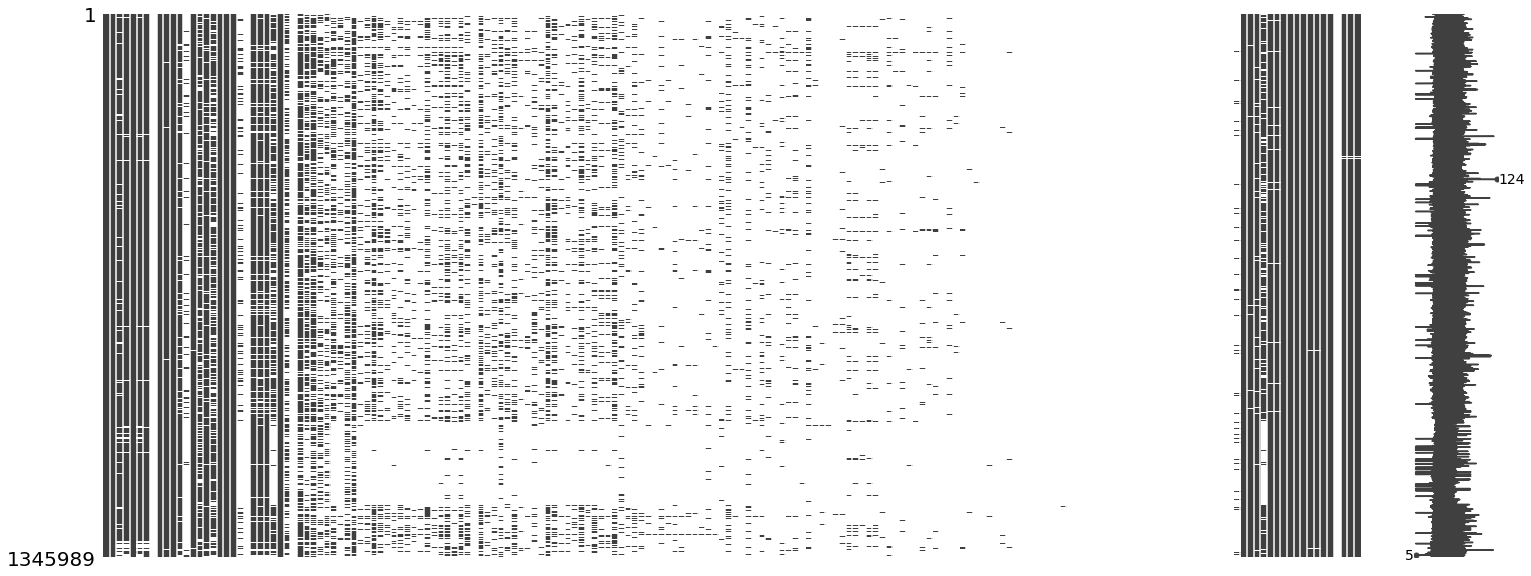

In [ ]:
# msno.matrix(df)
# plt.show() #후반부 컬럼 데이터들중 상당수가 절대다수 결측임을 확인. 이러한 데이터들 정리.

In [286]:
df2.isna().sum() #컬럼별 결측치 갯수

Unnamed: 0               0
listing_url              0
agent.name          152399
agent.license        61849
agent.url                0
                    ...   
created_at               0
images             1345989
images.url            5912
images.path           5912
images.checksum       5912
Length: 188, dtype: int64

In [290]:
# 결측치 비율이 높은 컬럼 리스트 추출
# 컬럼 목록 확인 및 결측치
count_null = pd.DataFrame()
count_null['variables'] = df2.columns.values.tolist()
# 컬럼별 결측치 확인
count_null['NaN'] = df2.isnull().sum().tolist()
# 컬럼별 결측비율(%) 계산
count_null['Nanperc'] = 100*(count_null['NaN']/len(df2))
count_null
# 결측치가 50%를 넘는 변수들의 리스트 생성
too_many_NaN = count_null[count_null['Nanperc']>50]
will_erase = list(too_many_NaN['variables'])

In [291]:
# 비어있는 컬럼 지우고 좀 더 슬림한 데이터프레임 df3 생성
df3 = df2.drop(columns = will_erase)

In [292]:
df3.info() # 45개의 컬럼이 남았음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345989 entries, 0 to 1345988
Data columns (total 45 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1345989 non-null  int64  
 1   URL                  1345989 non-null  object 
 2   agent.name           1193590 non-null  object 
 3   agent.license        1284140 non-null  object 
 4   agent.url            1345989 non-null  object 
 5   agent.agency         1284129 non-null  object 
 6   agent.phone_number   1310623 non-null  object 
 7   Type                 1345875 non-null  object 
 8   Tenure               1331437 non-null  object 
 9   Floorsize            1345647 non-null  object 
 10  Developer            1228348 non-null  object 
 11  PSF                  1343933 non-null  object 
 12  Furnishing           1067643 non-null  object 
 13  TOP                  1259223 non-null  float64
 14  Floor                974060 non-null   object 
 15

## 2-4) unnecessary columns

### 바닥면적의 단위, 화폐단위 컬럼 필요여부 판단(완료)

In [ ]:
# #floor_size_unit(sqft밖에없음), currency에 다양한 값 있는지 확인
# print(df['floor_size_unit'].unique())
# print(df['currency'].unique())
# # sqft랑 SGD가 NaN인 애들 몇개인지 확인 --> 이 변수들도 지우기로 결정 
# print(df2[df2['floor_size_unit'].isna()==True]['floor_size_unit']) #floor_size_unit가 NaN인 데이터들 324개행
# print(df2[df2['currency'].isna()==True]['currency']) # currency가 NaN인 데이터들 1,852개행

### images_urls 및 images.url 동일여부 판단(완료. 동일하지않음)

In [ ]:
# #image_urls랑 images.url 다른건지 확인
# count = 0
# for i in range(len(df2)):
#   if df2['image_urls'][i]!=df2['images.url'][i]:
#     count += 1

In [ ]:
# count

14182

In [ ]:
# df_image_url_different = df2[df2['image_urls']!=df2['images.url']]
# df_image_url_different[['image_urls', 'images.url']].head(20).to_csv('/content/drive/MyDrive/PropertyGuru/Nan_values/images_url_different.csv')

### 삭제할 컬럼 정리 추가진행

In [10]:
df3.head(1) 

,Unnamed: 0,URL,agent.name,agent.license,agent.url,agent.agency,agent.phone_number,Type,Tenure,Floorsize,Developer,PSF,Furnishing,TOP,Floor,ListingID,Tenanted,Listed_on,properties.Type,properties.TOP,properties.Tenure,Total Unit(s),properties.url,properties.name,Air-Conditioning,Cooker Hood,Water Heater,address.country,address.street,address.postal_code,address.locality,latitude,longitude,rooms,bathrooms,floor_size,floor_size_unit,price,currency,image_urls,created_at,images.url,images.path,images.checksum
0,0,http://api.scraperapi.com/?api_key=b0560c3ca5b...,Mark Yu,CEA: R024989D / L3002382K,https://propertyguru.com.sg/agent/mark-yu-155726,ERA REALTY NETWORK PTE LTD,+65 9248 3248,Condominium For Sale,99-year Leasehold,1345 sqft,United Venture Development (Clementi) Pte. Ltd.,"S$ 1,561.34 psf",Unfurnished,2019.0,High Floor,22010108.0,No,2 hours ago,Condominium,2019.0,99-year Leasehold,505.0,https://propertyguru.com.sg/project/the-clemen...,The Clement Canopy,True,True,True,sg,18 Clementi Avenue 1,129960.0,Buona Vista / West Coast / Clementi New Town,1.307856,103.769831,4,4,1345.0,sqft,2100000.0,SGD,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,2019-10-26 11:16:00.207427,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,full/24bc5bebbda71c1facf11be1f20ae2a67e680053.jpg,15a1054d58e29e823378a0dad33911c4


In [293]:
# df3 다시 보면서 필요 없어보이는 컬럼 리스트 추가하여 생성
will_erase_agent = ['agent.name', 'agent.license', 'agent.url', 'agent.agency', 'agent.phone_number'] #5개
will_erase_address = ['address.country', 'address.street', 'address.postal_code', 'floor_size_unit'] #좌표가 있으므로 주소 관련 변수 3개 삭제
will_erase_noneed = ['floor_size_unit', 'currency'] #모두 sqft, SGD인 것으로 볼 수 있어 불필요 
#image_urls, images.url, images.path, images.checksum 확인하고 이미지 확인하는데 필요한것만 남기기 - 확인 결과, 다 다른 컬럼들. 일단 다 남김
will_erase2 = will_erase_agent + will_erase_address + will_erase_noneed
print(will_erase2, len(will_erase2))

['agent.name', 'agent.license', 'agent.url', 'agent.agency', 'agent.phone_number', 'address.country', 'address.street', 'address.postal_code', 'floor_size_unit', 'floor_size_unit', 'currency'] 11


In [294]:
# df3 에서 불필요한 11개 컬럼 추가로 더 지우고 좀 더 슬림한 데이터프레임 df4 생성
df4 = df3.drop(columns = will_erase2)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345989 entries, 0 to 1345988
Data columns (total 35 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1345989 non-null  int64  
 1   URL                1345989 non-null  object 
 2   Type               1345875 non-null  object 
 3   Tenure             1331437 non-null  object 
 4   Floorsize          1345647 non-null  object 
 5   Developer          1228348 non-null  object 
 6   PSF                1343933 non-null  object 
 7   Furnishing         1067643 non-null  object 
 8   TOP                1259223 non-null  float64
 9   Floor              974060 non-null   object 
 10  ListingID          1345875 non-null  float64
 11  Tenanted           1345875 non-null  object 
 12  Listed_on          1345875 non-null  object 
 13  properties.Type    1239108 non-null  object 
 14  properties.TOP     1210708 non-null  float64
 15  properties.Tenure  1238732 non-n

### 슬림화된 데이터프레임의 결측치 현황 중간점검

결측치 처리에 대한 Discussion 
- 결측이 별로 없는 데이터의 경우 삭제 계획
- 위치정보가 없는 데이터의 경우 삭제
- 이미지가 없는 데이터의 경우 삭제
- 데이터 갯수 충분해서 삭제해도 될 것으로 판단

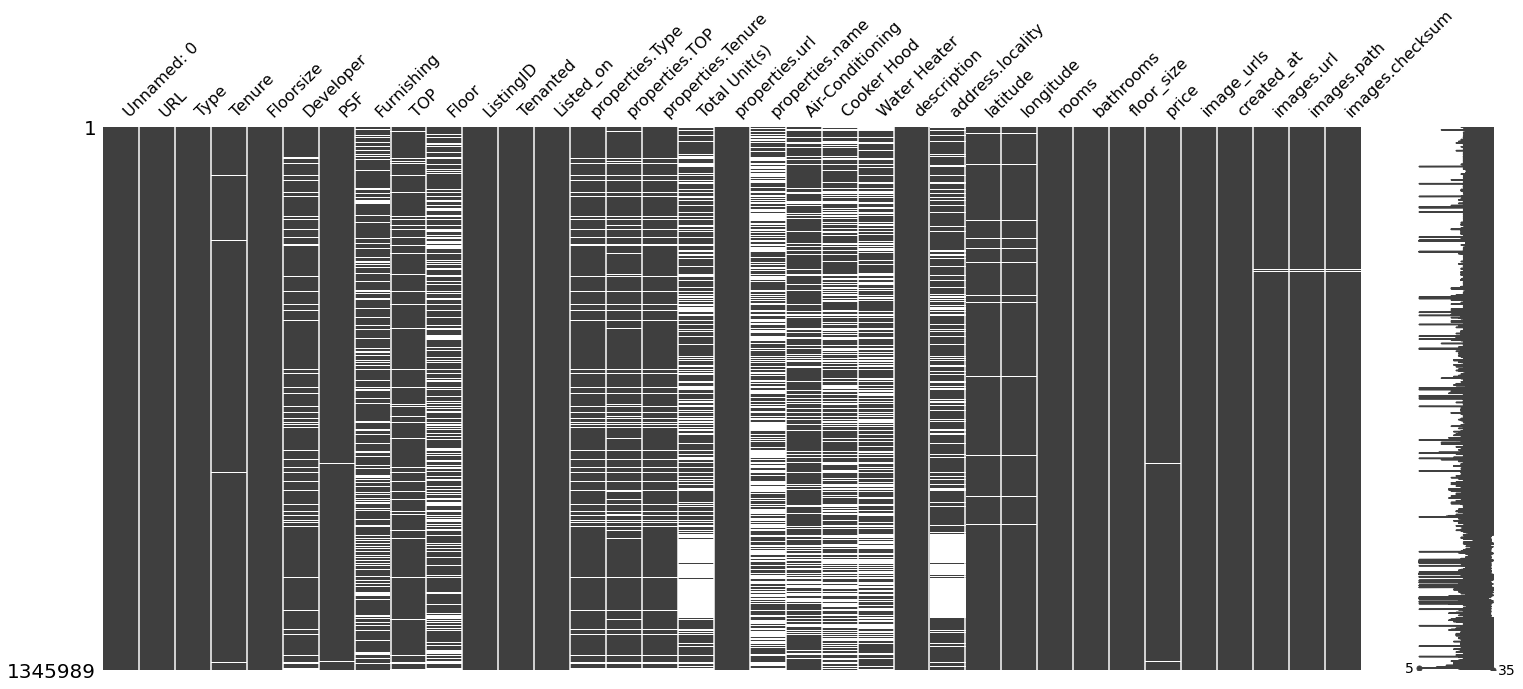

In [295]:
msno.matrix(df4)
plt.show()

In [216]:
# Listed_on(게시물 등록날짜)가 결측인 데이터 제외
df4.dropna(subset=['Listed_on'], inplace=True)
df4['Listed_on'].isna().sum()

0

## 2-5) Duplicates

In [160]:
df4[df4.duplicated(keep=False)] # 중복값 확인 결과, 모든 컬럼이 중복되는 record는 없음

,Unnamed: 0,URL,Type,Tenure,Floorsize,Developer,PSF,Furnishing,TOP,Floor,ListingID,Tenanted,Listed_on,properties.Type,properties.TOP,properties.Tenure,Total Unit(s),properties.url,properties.name,Air-Conditioning,Cooker Hood,Water Heater,address.locality,latitude,longitude,rooms,bathrooms,floor_size,price,image_urls,created_at,images.url,images.path,images.checksum


## 2-6) time after listing : 게시물 등록 후 경과시간
listing_properties.Listed on(언제 이 게시물이 올라왔는지를 의미)변수의 numerical 변수화 필요





#### How to

In [215]:
df4.head()
# slim화된 데이터 1000개 head sample화
df4.sample(1000).to_csv('/content/drive/MyDrive/PropertyGuru/PreparedCSV/2019-10-28/sale/slimed_head.csv')

In [217]:
sampledata = pd.read_csv("/content/drive/MyDrive/PropertyGuru/PreparedCSV/2019-10-28/sale/slimed_head.csv")

In [218]:
sampledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Unnamed: 0.1       1000 non-null   int64  
 2   URL                1000 non-null   object 
 3   Type               1000 non-null   object 
 4   Tenure             989 non-null    object 
 5   Floorsize          1000 non-null   object 
 6   Developer          906 non-null    object 
 7   PSF                998 non-null    object 
 8   Furnishing         786 non-null    object 
 9   TOP                931 non-null    float64
 10  Floor              732 non-null    object 
 11  ListingID          1000 non-null   float64
 12  Tenanted           1000 non-null   object 
 13  Listed_on          1000 non-null   object 
 14  properties.Type    915 non-null    object 
 15  properties.TOP     893 non-null    float64
 16  properties.Tenure  915 no

In [219]:
df = sampledata

In [220]:
## idea: 공백을 기준으로 분리 --> 가운데 글자가 seconds, minutes, hours 이면 0, 
#        days이면 1, week 또는 weeks 이면 7, month 또는 months 이면 30을 반환 --> 공백 앞 숫자랑 곱함
# 숫자
df['Listed_on_num'] = df['Listed_on'].str.split(' ').str.get(0)
# 포스팅 된 시간단위
df['Listed_on_day'] = df['Listed_on'].str.split(' ').str.get(1)
# 시간단위 list of lists
posted = [['second', 'seconds','minute', 'minutes', 'hour', 'hours'], ['day','days'], ['week', 'weeks'], ['month', 'months'], ['year', 'years']]

for idx, time in enumerate(posted):
    df['Listed_on_day'].replace(time, idx, inplace = True)

In [221]:
# 앞 숫자가 실행된 횟수인 idx, 뒤에가 타임
for idx, time in enumerate(posted):
    print(idx, time)

0 ['second', 'seconds', 'minute', 'minutes', 'hour', 'hours']
1 ['day', 'days']
2 ['week', 'weeks']
3 ['month', 'months']
4 ['year', 'years']


In [222]:
# 2(week) -> 7일, 3(month) -> 30일, 4(year) -> 365
df['Listed_on_day'].replace(2,7, inplace = True)
df['Listed_on_day'].replace(3,30, inplace = True)
df['Listed_on_day'].replace(4,365, inplace = True)

# Listed_on 변수를 해당 일수로 대체
df['Listed_on'] = df['Listed_on_num'].astype('int') * df['Listed_on_day'].astype('int')

0    14
1     2
2     1
3     3
4     2
5    14
6     1
7     3
8     2
9     3
Name: Listed_on, dtype: int64

#### processing

In [224]:
# 숫자
df4['Listed_on_num'] = df4['Listed_on'].str.split(' ').str.get(0)
# 포스팅 된 시간단위
df4['Listed_on_day'] = df4['Listed_on'].str.split(' ').str.get(1)
# 시간단위 list of lists
posted = [['second', 'seconds','minute', 'minutes', 'hour', 'hours'], ['day','days'], ['week', 'weeks'], ['month', 'months'], ['year', 'years']]

for idx, time in enumerate(posted):
    df4['Listed_on_day'].replace(time, idx, inplace = True)
# 2(week) -> 7일, 3(month) -> 30일, 4(year) -> 365
df4['Listed_on_day'].replace(2,7, inplace = True)
df4['Listed_on_day'].replace(3,30, inplace = True)
df4['Listed_on_day'].replace(4,365, inplace = True)
# Listed_on 변수를 해당 일수로 대체
df4['Listed_on'] = df4['Listed_on_num'].astype('int') * df4['Listed_on_day'].astype('int')

In [ ]:
df4['Listed_on'].tail(50)

## 2-7) listed_date : 게시물 등록 시점(날짜) 변수 생성하기

Idea: created_at에 있는 날짜에다가, 앞에서 구한 경과일수를 빼서 구함.

ex) 2019년 10월 26일 - 2 days ago = 2019년 10월 24일

In [231]:
df4['created_at'].str[:10]
# created_at 컬럼은 글이 올라온 시간이 아니라, 이 데이터 스크랩핑이 이루어진 시간을 의미함.
# 2019년 10월 폴더 내에 있는 sale 데이터셋에서 created_at 컬럼 값은 2019년 10월 26일~29일 범위 외에는 없음.
# 이 기간동안 scraping이 진행된 것임.

0          2019-10-26
1          2019-10-26
2          2019-10-26
3          2019-10-26
4          2019-10-26
              ...    
1345984    2019-10-29
1345985    2019-10-29
1345986    2019-10-29
1345987    2019-10-29
1345988    2019-10-29
Name: created_at, Length: 1345875, dtype: object

In [232]:
# created_at 변수(2019-10-26 11:16:00.207427)를 이용, 연-월-일로 변경
df4['created_at'] = pd.to_datetime(df3['created_at'].str[:10])

In [233]:
df4['listed_date'] = df4['created_at'] - df4['Listed_on']

TypeError: ignored

## 2-8) year19: 코로나 팬데믹 전후 여부 관련 변수 생성

listing_date에서 year추출--> 2019년이면 year19에 1이 들어가고, 이외는 0

In [ ]:
# 연도 변수 생성 함수 정의
def parse_year(s):
  return int(s[:4])
# apply() 함수를 이용하여 벡터 연산을 진행
df3['year'] = df['created_at'].apply(parse_year)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345989 entries, 0 to 1345988
Data columns (total 35 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Unnamed: 0         1345989 non-null  int64         
 1   URL                1345989 non-null  object        
 2   Type               1345875 non-null  object        
 3   Tenure             1331437 non-null  object        
 4   Floorsize          1345647 non-null  object        
 5   Developer          1228348 non-null  object        
 6   PSF                1343933 non-null  object        
 7   Furnishing         1067643 non-null  object        
 8   TOP                1259223 non-null  float64       
 9   Floor              974060 non-null   object        
 10  ListingID          1345875 non-null  float64       
 11  Tenanted           1345875 non-null  object        
 12  Listed_on          1345875 non-null  object        
 13  properties.Type    1239108 

## 2-9) 같은 정보 컬럼 보완/병합

* Type vs properties.Type

* Tenure vs properties.Tenure

* TOP vs properties.TOP


같은 정보를 담고 있는 컬럼들이라서 결측치 뭐가 더 많은지 살펴보고 둘 중 하나 지울 필요 있음 

--> 이거 결정하면 앞에 will_erase 파트에 넣어서 삭제되게 만들기+ rename 함수에도 없애는 거 고쳐야 함

Type이랑 properties.Type 각각 결측치 몇개?
Type이랑 properties.Type 중 하나만 결측인거 서로 보완
--> Type 이라는 변수 하나로 만들기

Tenure 랑 properties.Tenure 각각 결측치 몇개?
Tenure랑 properties.Tenure 중 하나만 결측인거 서로 보완
--> Tenure라는 변수 하나로 만들기

TOP도 마찬가지로 하기

## 2-10) 데이터타입 교정 (object --> float)
* Floorsize (sqft)
* PSF (S$ psf) 
* 숫자 앞뒤 문자열 걷어내고 수치형으로 교정


In [ ]:
df4.head(3)

,Unnamed: 0,URL,Type,Tenure,Floorsize,Developer,PSF,Furnishing,TOP,Floor,ListingID,Tenanted,Listed_on,properties.Type,properties.TOP,properties.Tenure,Total Unit(s),properties.url,properties.name,Air-Conditioning,Cooker Hood,Water Heater,address.locality,latitude,longitude,rooms,bathrooms,floor_size,price,image_urls,created_at,images.url,images.path,images.checksum,year
0,0,http://api.scraperapi.com/?api_key=b0560c3ca5b...,Condominium For Sale,99-year Leasehold,1345 sqft,United Venture Development (Clementi) Pte. Ltd.,"S$ 1,561.34 psf",Unfurnished,2019.0,High Floor,22010108.0,No,2 hours ago,Condominium,2019.0,99-year Leasehold,505.0,https://propertyguru.com.sg/project/the-clemen...,The Clement Canopy,True,True,True,Buona Vista / West Coast / Clementi New Town,1.307856,103.769831,4,4,1345.0,2100000.0,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,2019-10-26,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,full/24bc5bebbda71c1facf11be1f20ae2a67e680053.jpg,15a1054d58e29e823378a0dad33911c4,2019
1,1,http://api.scraperapi.com/?api_key=b0560c3ca5b...,Condominium For Sale,99-year Leasehold,1345 sqft,United Venture Development (Clementi) Pte. Ltd.,"S$ 1,561.34 psf",Unfurnished,2019.0,High Floor,22010108.0,No,2 hours ago,Condominium,2019.0,99-year Leasehold,505.0,https://propertyguru.com.sg/project/the-clemen...,The Clement Canopy,True,True,True,Buona Vista / West Coast / Clementi New Town,1.307856,103.769831,4,4,1345.0,2100000.0,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,2019-10-26,https://sg2-cdn.pgimgs.com/listing/22010108/UP...,full/96c4833bfdc0b040270d543e8b50b0cf2cdd5b91.jpg,63cd1f758e00586c9b58ab4def04811f,2019
2,2,http://api.scraperapi.com/?api_key=b0560c3ca5b...,Condominium For Sale,99-year Leasehold,1345 sqft,United Venture Development (Clementi) Pte. Ltd.,"S$ 1,561.34 psf",Unfurnished,2019.0,High Floor,22010108.0,No,2 hours ago,Condominium,2019.0,99-year Leasehold,505.0,https://propertyguru.com.sg/project/the-clemen...,The Clement Canopy,True,True,True,Buona Vista / West Coast / Clementi New Town,1.307856,103.769831,4,4,1345.0,2100000.0,https://sg1-cdn.pgimgs.com/listing/22010108/UP...,2019-10-26,https://sg1-cdn.pgimgs.com/listing/22010108/UP...,full/6e0dbd68dda0df05b7b6ecdd3161081aa62c9121.jpg,c30fabd3df582b24dfe9f1fc416df36d,2019


**Memo**

컬럼 너무 많은경우, pd.read_csv('data.csv', usecols = ['col1','col2']) 이런 식으로 usecols 인자를 사용해서 읽어오기